#Clasificación Supervisada
- DecisionTreeClassifier (Arbol)
- RandomForestClassifier (Arbol)
- ExtraTreesClassifier (Arbol)
- OneVsOneClassifier (SVM)
- KNeighborsClassifier (K-Nearest Neighbors (KNN))



In [ ]:
#Immportamos librerias a usar
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
#montamos nuestro GDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Arboles
**Bagging**
(Bootstrap aggregation) Permite seleccionar de nuestro mismos dataset diferentes subsets para entrenar neustro algoritmo. Ayuda a prevenir el Overfitting y mejora la estabilidad de nuestros algoritmos al tener en cuenta diferentes muestras que contienen datos similares con reemplazo

https://www.analyticsvidhya.com/blog/2020/02/what-is-bootstrap-sampling-in-statistics-and-machine-learning/#:~:text=Bootstrap%20sampling%20is%20used%20in,dataset%20are%20extracted%20with%20replacement.


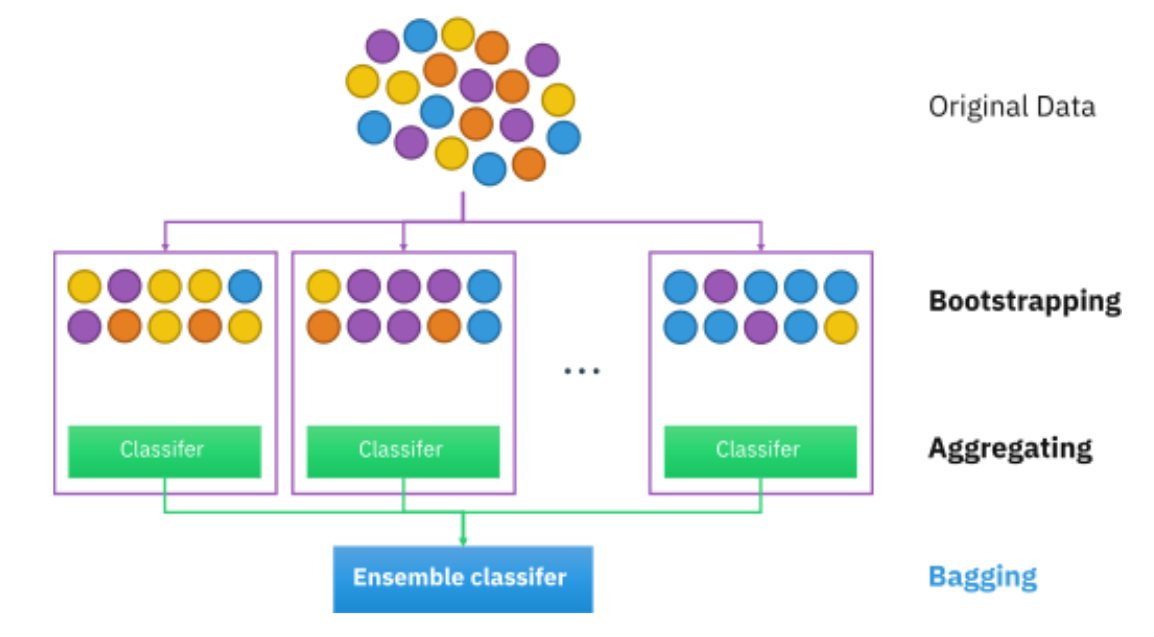

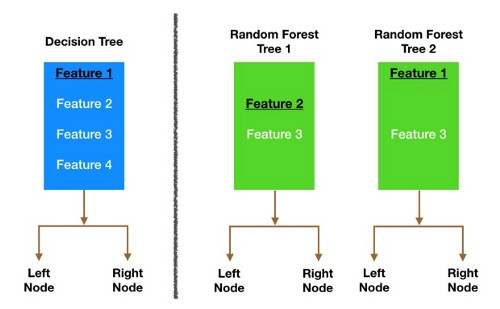

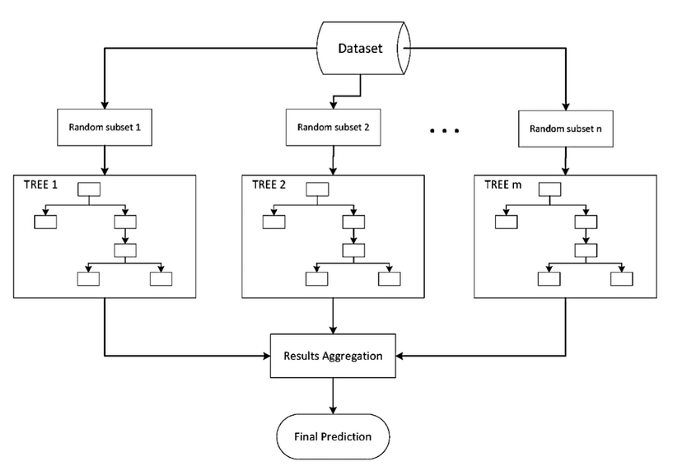

Random Forest tiende a ser menos influenciado por Outliers al ser un arbol de decisión.

* Se suele usar para predecir resultados y asignar probabilidades a cada uno de ellos
* Que tanto puede que nos vuelva a comprar un usuario dependiendo de sus variables
* Toma de decisiones de la empresa
* Aprobación de credito


In [ ]:
#Importamos neustro dataset
#Text File con números aleatorios.
#imaginar que son puntuaciones de score crediticio, 1 es se aprueba 0 no
#359 registros
inputfile = '/content/drive/MyDrive/Databases/Week 18/data_decision_trees.txt'
data = np.loadtxt(inputfile, delimiter=',')
X, y = data[:, :-1], data[:,-1]

In [ ]:
# Separando dataset en dos etiquetas
#X y Y, podríamos pensarlo como ____________
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

Text(0.5, 1.0, 'Input data')

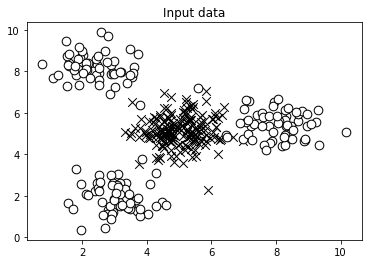

In [ ]:
# Visualizando datos para ver como se comportan
fig = plt.figure(facecolor='w')
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black', 
        edgecolors='black', linewidth=1, marker='x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', 
        edgecolors='black', linewidth=1, marker='o')
plt.title('Input data')

In [ ]:
# Separando entre entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=5)

#Decision Tree Classifier

In [ ]:
# Usando Decision Tree Classifier
# Con todos los parametros
#max_despth nos podría ayudar a que neustro arbol no se fuera muy a detalle
#gini es el criterio que usará el arbol para escoger los mejores caminos
params = {'random_state': 0, 'max_depth': 4}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
#Definimos funcion para ver nuestro clasficiaror de ahora en adelante.
def visualize_classifier(classifier, X, y, title=''):
  #obteniendo nuestro min y max para el arange
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    
    # paso que tomara nuestro grid
    mesh_step_size = 0.01
    
    # Define the mesh grid of X and Y values
    #manera automatica de crear un grid para nuestro rango de datos
    #x_vals convierte nustro arreglo de 2D en uno de 1D,
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))
    
    #Ejecutando neustro modelo para los valores
    #Ravel permite convertir el arerglo a 1 D
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    
    # Cambiamos el tamoño de nuestro output 
    output = output.reshape(x_vals.shape)
    
    # Create a plot
    plt.figure()
    
    # Specify the title
    plt.title(title)
    
    # Creamos el color de nustra grafica. Practicamente es estar mapeando los limites de donde a donde
    #va a colorear y los colores o escalara de colores la determinamos en cmap
    # Colores secuenciales, divergentes, etc...
    #https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.hot)
    
    # Crea un scatterplot con cada valor de X y y, color del marker
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)
    
    # Especigicamos de donde a donde va nuestro plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())
    
    # Especificamos marcador en nuestro eje x y y.
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))
    
    plt.show()


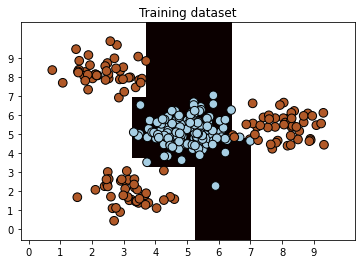

In [ ]:
#Visualizando nuestro clasificar con los de entrenamiento
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

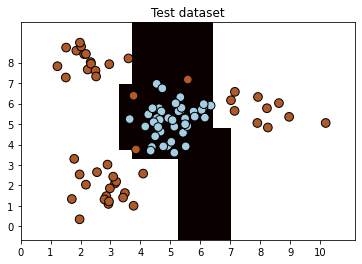

In [ ]:
#Visualizando nuestro clasificar con los de prueba
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

In [ ]:
# Evaluamos el performance de nuestro classifier
#tanto en nuestro test como en nuestro train
class_names = ['Class-0', 'Class-1']
print("\n" + "#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
print("#"*40 + "\n")

print("#"*40)
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))
print("#"*40 + "\n")

plt.show()

# Precision son los verdaderos positivos, que porcentaje de nuestros datos fueron
#correctamente predicho
#recall cuantos items de los que seleccionaste fueron importanets o que realmente
#pertencian a esa clase
#f1 score pondera ambos, nos interesa cuando ambas de antes nos interesan
#0 muy malo, 1 de maravilla


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.99      1.00      1.00       137
     Class-1       1.00      0.99      1.00       133

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.93      1.00      0.97        43
     Class-1       1.00      0.94      0.97        47

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90

########################################



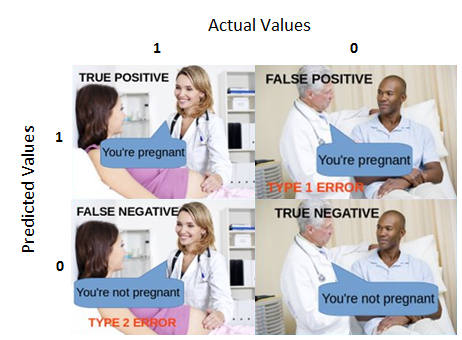

In [ ]:
#COnfussion Matrix
from sklearn.metrics import plot_confusion_matrix

y_pred_test_rf = classifier.predict(X_test)
confusion_matrix(y_test, y_pred_test_rf)

array([[43,  0],
       [ 3, 44]])

0.9680851063829787

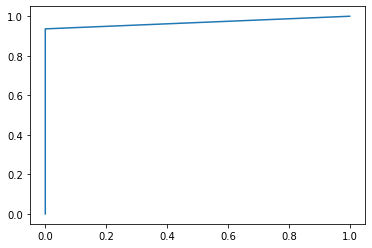

In [ ]:
#AUC
y_pred_proba_rf = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_rf)
auc = metrics.roc_auc_score(y_test, y_pred_proba_rf)

plt.plot(fpr,tpr)
auc

#Random Forest Classifier

Random Forest is suitable for situations when we have a large dataset, and interpretability is not a major concern.
Random Forest is suitable for situations when we have a large dataset, and interpretability is not a major concern

In [ ]:
#Importamos otros classfiiers a usar
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier



In [ ]:
#importamos dataset nuevo
#Separamos Datasets X y Y
#900 datos
#Mas que antes
#Uno puede ser de se aprueba, no se aprueba, necesitamos más info
input_file = '/content/drive/MyDrive/Databases/Week 18/data_random_forests.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]


In [ ]:
#Separamos cada una de neustras clases
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])
class_2 = np.array(X[y==2])

Text(0.5, 1.0, 'Input data')

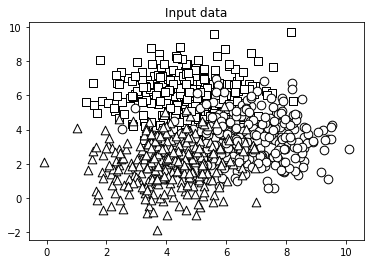

In [ ]:
#Visualizando neustras clases
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='white', edgecolors = 'black', linewidth=1, marker='s')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', edgecolors = 'black', linewidth=1, marker='o')
plt.scatter(class_2[:, 0], class_2[:, 1], s=75, facecolors='white', edgecolors = 'black', linewidth=1, marker='^')
plt.title('Input data')



In [ ]:
#separando datasets de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)


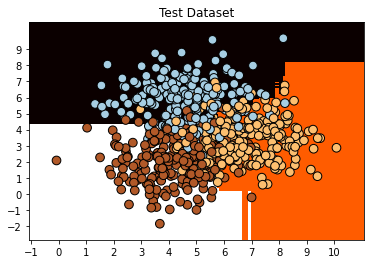

In [ ]:
#Visualizando nuestro classiffier RANDOM FOREST
# n_estimators son la cantidad de arboles a usar en el algoritmo
classifier = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_train, y_train, 'Test Dataset')

In [ ]:
#evaluando performance
class_names = ['Class-0', 'Class-1', 'Class-2'] 
print("\n" + "#"*40) 
print("\nClassifier performance on training dataset\n") 
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names)) 
print("#"*40 + "\n") 

print("#"*40) 
print("\nClassifier performance on test dataset\n") 
print(classification_report(y_test, y_test_pred, target_names=class_names)) 
print("#"*40 + "\n")


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.91      0.86      0.88       221
     Class-1       0.84      0.87      0.86       230
     Class-2       0.86      0.87      0.86       224

    accuracy                           0.87       675
   macro avg       0.87      0.87      0.87       675
weighted avg       0.87      0.87      0.87       675

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.92      0.85      0.88        79
     Class-1       0.86      0.84      0.85        70
     Class-2       0.84      0.92      0.88        76

    accuracy                           0.87       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.87      0.87      0.87       225

###########################

In [ ]:
print(classifier.predict_proba([[5, 5]])[0])
print(np.argmax(classifier.predict_proba([[5, 5]])[0]))
print(classifier.predict_proba([[7, 2]])[0])
print(np.argmax(classifier.predict_proba([[7, 2]])[0]))

[0.81427532 0.08639273 0.09933195]
0
[0.05415465 0.70660226 0.23924309]
1



Confidence measure:

Datapoint: [5 5]
Predicted class: Class-0

Datapoint: [3 6]
Predicted class: Class-0

Datapoint: [6 4]
Predicted class: Class-1

Datapoint: [7 2]
Predicted class: Class-1

Datapoint: [4 4]
Predicted class: Class-2

Datapoint: [5 2]
Predicted class: Class-2


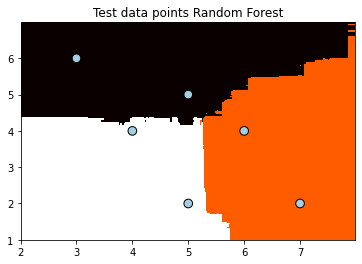

In [ ]:
#GEnerando puntos aleatorios para ver como se comporta
test_datapoints = np.array([[5, 5], [3, 6], [6, 4], [7, 2], [4, 4], [5, 2]])
print("\nConfidence measure:") 
for datapoint in test_datapoints: 
    #Regresa la probabilidad de cada una de las clases según el punto pasado
    probabilities = classifier.predict_proba([datapoint])[0] 
    #Muestra el indice de la clase que tiene el mayor peso
    predicted_class = 'Class-' + str(np.argmax(probabilities)) 
    print('\nDatapoint:', datapoint) 
    print('Predicted class:', predicted_class)
#Como y pasamos nuestros valores como 0, con el test_datapoints y los colores ya es suficiente
visualize_classifier(classifier, test_datapoints, [0]*len(test_datapoints), 'Test data points Random Forest')

#Extra Trees Classifier

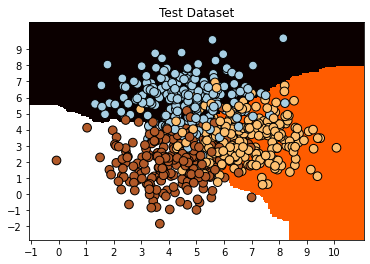

In [ ]:
#Visualizando nuestro classiffier EXTRA TREES
classifier = ExtraTreesClassifier(n_estimators=100, max_depth=4, random_state=0)
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_train, y_train, 'Test Dataset')



In [ ]:
#Evaluando performance extra trees
class_names = ['Class-0', 'Class-1', 'Class-2'] 
print("\n" + "#"*40) 
print("\nClassifier performance on training dataset\n") 
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names)) 
print("#"*40 + "\n") 

print("#"*40) 
print("\nClassifier performance on test dataset\n") 
print(classification_report(y_test, y_test_pred, target_names=class_names)) 
print("#"*40 + "\n")




########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.89      0.83      0.86       221
     Class-1       0.82      0.84      0.83       230
     Class-2       0.83      0.86      0.85       224

    accuracy                           0.85       675
   macro avg       0.85      0.85      0.85       675
weighted avg       0.85      0.85      0.85       675

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.92      0.85      0.88        79
     Class-1       0.84      0.84      0.84        70
     Class-2       0.85      0.92      0.89        76

    accuracy                           0.87       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.87      0.87      0.87       225

###########################


Confidence measure:

Datapoint: [5 5]
Predicted class: Class-0

Datapoint: [3 6]
Predicted class: Class-0

Datapoint: [6 4]
Predicted class: Class-1

Datapoint: [7 2]
Predicted class: Class-1

Datapoint: [4 4]
Predicted class: Class-2

Datapoint: [5 2]
Predicted class: Class-2


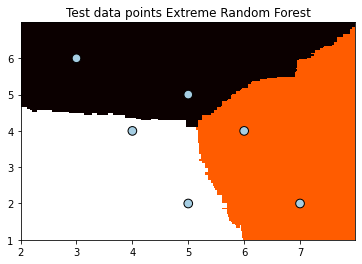

In [ ]:
#GEnerando puntos aleatorios para ver como se comporta
test_datapoints = np.array([[5, 5], [3, 6], [6, 4], [7, 2], [4, 4], [5, 2]])
print("\nConfidence measure:") 
for datapoint in test_datapoints: 
    probabilities = classifier.predict_proba([datapoint])[0] 
    predicted_class = 'Class-' + str(np.argmax(probabilities)) 
    print('\nDatapoint:', datapoint) 
    print('Predicted class:', predicted_class)

visualize_classifier(classifier, test_datapoints, [0]*len(test_datapoints), 'Test data points Extreme Random Forest')



#SVM
*https://datascience.stackexchange.com/questions/6838/when-to-use-random-forest-over-svm-and-vice-versa*

Las Máquinas de Vectores de Soporte (Support Vector Machines) permiten encontrar la forma óptima de clasificar entre varias clases. La clasificación óptima se realiza maximizando el margen de separación entre las clases. 

Este margen siempre se intenta que sea el maximo para que no se clasifiquen incorrectamente

Los vectores que definen el borde de esta separación son los vectores de soporte. En el caso de que las clases no sean linealmente separables, podemos usar el truco del kernel para añadir una dimensión nueva donde sí lo sean.

Uso de SVM:

* reconocimiento óptico de caracteres
* detección de caras para que las cámaras digitales enfoquen correctamente
* filtros de spam para correo electrónico
* reconocimiento de imágenes abordo de satélites (saber qué partes de una imagen tienen nubes, tierra, agua, hielo, etc.)
* Actualmente, las redes neuronales profundas tienen una mayor capacidad de aprendizaje y generalización que los SVM.


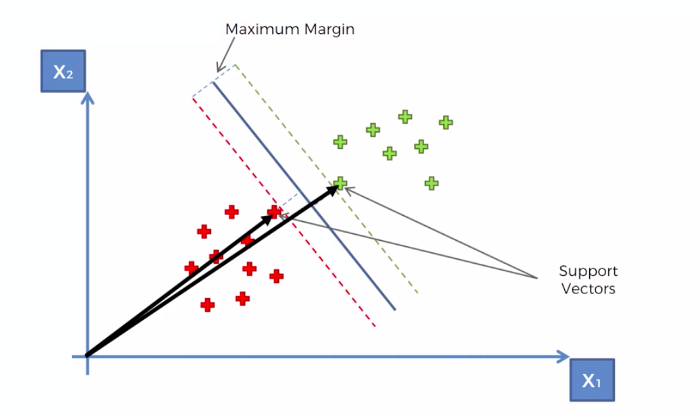

Lo que hace SVM Es dibujar una linea entre dos clases, lo que caiga de un 

---

lado es de una clase y así...

## Truco de Kernal
Hay veces en las que no hay forma de encontrar una hiperplano que permita separar dos clases. En estos casos decimos que las clases no son linealmente separables. Para resolver este problema podemos usar el truco del kernel.

El truco del kernel consiste en inventar una dimensión nueva en la que podamos encontrar un hiperplano para separar las clases. En la siguiente figura vemos cómo al añadir una dimensión nueva, podemos separar fácilmente las dos clases con una superficie de decisión.

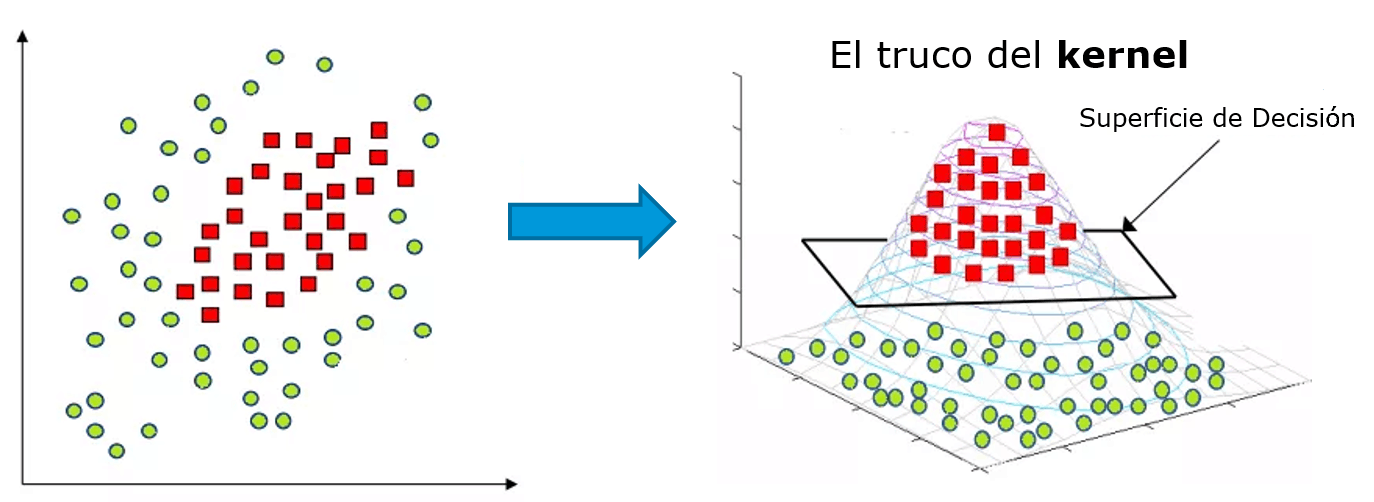

In [ ]:
#Support Vector Machine
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
#from sklearn import cross_val_score


In [ ]:
# Datos de Income de los users
#Ingreso de los usuarios
#Según sus caracteristicas se clasifica si van mas o menos de 50k
#32561
input_file = '/content/drive/MyDrive/Databases/Week 18/income_data.txt'

In [ ]:
# Definimos arrays vacios
X = []
y = []
# Definimos conteo de clases a 0
count_class1 = 0
count_class2 = 0
# Agregamos limite para nuestro SVM
max_datapoints = 25000

with open(input_file, 'r') as f:
  # Va layendo linea por linea nuestro test file
    for line in f.readlines():
        if count_class1 >= max_datapoints and count_class2 >= max_datapoints:
            break
        # Si tiene un signo de interrogaciòn, regresamos al loop y omitimos valor
        if '?' in line:
            continue
            
        data = line[:-1].split(', ')        
        # Le vamos diciendo A cual pertenece, le damos una clase y lo agregamos al array
        if data[-1] == '<=50K' and count_class1 < max_datapoints:
            X.append(data)
            count_class1 += 1

        if data[-1] == '>50K' and count_class2 < max_datapoints:
            X.append(data)
            count_class2 += 1
X = np.array(X)

In [ ]:
#Usamos Label Encoder para convertir categoricas a numericas
label_encoder = [] 
X_encoded = np.empty(X.shape)
for i,item in enumerate(X[0]):
    if item.isdigit(): 
        X_encoded[:, i] = X[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(X[:, i])

X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)


In [ ]:
# Creamos SVM clasificador
# Por cada feature que tenemos divide nuestro dataset según tantos features tengamos
# y empieza a entrenar.
# Cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
classifier = OneVsOneClassifier(LinearSVC(random_state=0, max_iter=4000))
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# Imprimimos nuestro score F1 para nuestro clasificador.
# Usamos crossvalidation 
f1 = cross_val_score(classifier, X, y, scoring='f1_weighted', cv=3)
print("F1 score: " + str(round(100*f1.mean(), 2)) + "%")

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


F1 score: 72.82%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# Probando con un ejemplo a ver en que lo clasificarìa
input_data = ['37', 'Private', '215646', 'HS-grad', '9', 'Never-married', 'Handlers-cleaners', 'Not-in-family', 'White', 'Male', '0', '0', '40', 'United-States']


input_data_encoded = [-1] * len(input_data)

count = 0

for i, item in enumerate(input_data):
  #verificamos si es digito, si si lo dejamos tal cual
    if item.isdigit():
        input_data_encoded[i] = int(input_data[i])
    else:
      #si no, llamamos al label encoder
        # print(label_encoder[0].transform(['Private']))
        input_data_encoded[i] = int(label_encoder[count].transform([input_data[i]]))
        count += 1 

input_data_encoded = np.array(input_data_encoded)


In [ ]:
# ejecutamos clasificador con la info encoded e imprimimos resultado
predicted_class = classifier.predict([input_data_encoded])
print(label_encoder[-1].inverse_transform(predicted_class)[0])

>50K


#KNN (K- Narest Neighbor)



1.   Calcular la distancia entre el item a clasificar y el resto de items del DS
de entrenamient
2.   Selecciona los k elemenots con menor distancia
3. Raliza una "votación" de aquellos que más se acerquen. Los de una clase que
dominen decidiran el resultado

Las formas más populares de “medir la cercanía” entre puntos son la distancia Euclidiana (la “de siempre”) o la Cosine Similarity

Como pros tiene sobre todo que es sencillo de aprender e implementar. Tiene como contras que utiliza todo el dataset para entrenar “cada punto” y por eso requiere de uso de mucha memoria y recursos de procesamiento (CPU). 

Por estas razones kNN tiende a funcionar mejor en datasets pequeños y sin una cantidad enorme de features 

Posibles caso de uso

 * sistemas de recomendación
 * búsqueda semántica 
 * detección de anomalías.

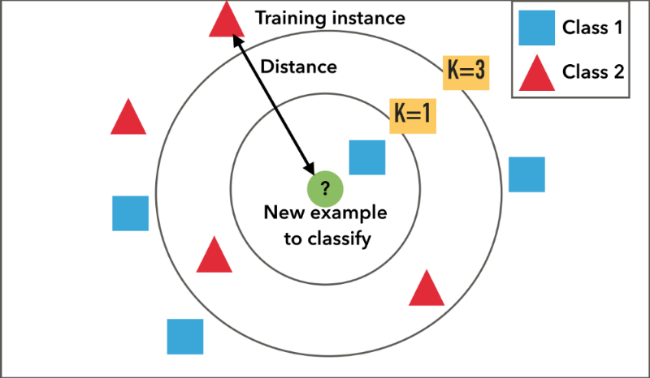

In [ ]:
# Importamos Neighbors y dataset.
import matplotlib.cm as cm
from sklearn import neighbors, datasets
# Load input data
# 4 clases, siguiendo con el ejemplo de prestamos:
#Ahora tenemos 2 clases mpas, una que nos dice si se necesita mas ingo
#otra de reportar con seguirdad
input_file = '/content/drive/MyDrive/Databases/Week 18/data.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1].astype(np.int)


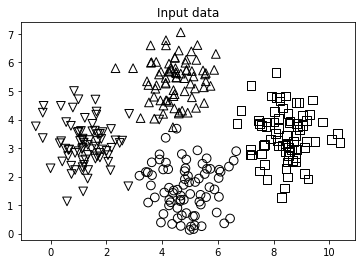

In [ ]:
# Vemos como estan nuestros datos
plt.figure()
plt.title('Input data')
#Creamos arrego para tener diferentes markers según nuesrto punto
marker_shapes = 'v^os'
mapper = [marker_shapes[i] for i in y]
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=75, edgecolors='black', facecolors='none')



In [ ]:
# Numero de vecinos que va a elegir para clasificar
num_neighbors = 12


# Creamos nuestro clasificador
# ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

# ‘distance’ : weight points by the inverse of their distance. 
#in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

# [callable] : a user-defined function which accepts an array of distances, 
#and returns an array of the same shape containing the weights.
classifier = neighbors.KNeighborsClassifier(num_neighbors, weights='distance')


In [ ]:
# Entrenamos nuestro modelo
classifier.fit(X, y)

# Creamos nuestro tamño para el mesh
step_size = 0.01  

# Creamos los limites
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), 
        np.arange(y_min, y_max, step_size))

In [ ]:
# Evaluamos el clasdiciador en todos los puntos del grid
# Ravel permite convertir el arerglo a 1 D
output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

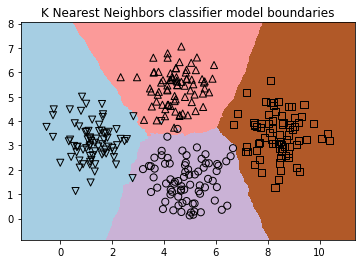

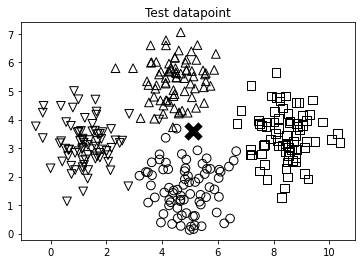

In [ ]:
# Vamos a ver como le fue a nuestro clasificador
output = output.reshape(x_values.shape)
plt.figure()

plt.pcolormesh(x_values, y_values, output, cmap=cm.Paired)
# Overlay the training points on the map
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=50, edgecolors='black', facecolors='none')

# plt.xlim(x_values.min(), x_values.max())
# plt.ylim(y_values.min(), y_values.max())
plt.title('K Nearest Neighbors classifier model boundaries')

# Generando uno de prueba
test_datapoint = [5.1, 3.6]
plt.figure()
plt.title('Test datapoint')
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=75, edgecolors='black', facecolors='none')

plt.scatter(test_datapoint[0], test_datapoint[1], marker='x', 
        linewidth=6, s=200, facecolors='black')

In [ ]:
# test_datapoint = [0, 1] #Clase 0
# test_datapoint = [4, 1]#Clase 2
# test_datapoint = [10, 1]#Clase3
test_datapoint = [4, 6]#clase 1
print("Predicted output:", classifier.predict([test_datapoint]))

plt.show()

Predicted output: [1]
